<a href="https://www.kaggle.com/code/arnabmukherjee853/digits-detection-pca?scriptVersionId=168145690" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from sklearn import datasets

In [3]:
dir(datasets)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__getattr__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_arff_parser',
 '_base',
 '_california_housing',
 '_covtype',
 '_kddcup99',
 '_lfw',
 '_olivetti_faces',
 '_openml',
 '_rcv1',
 '_samples_generator',
 '_species_distributions',
 '_svmlight_format_fast',
 '_svmlight_format_io',
 '_twenty_newsgroups',
 'clear_data_home',
 'dump_svmlight_file',
 'fetch_20newsgroups',
 'fetch_20newsgroups_vectorized',
 'fetch_california_housing',
 'fetch_covtype',
 'fetch_kddcup99',
 'fetch_lfw_pairs',
 'fetch_lfw_people',
 'fetch_olivetti_faces',
 'fetch_openml',
 'fetch_rcv1',
 'fetch_species_distributions',
 'get_data_home',
 'load_breast_cancer',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine',
 'make_biclusters',
 'make_blobs',
 'make_checkerboard',
 'make_circl

In [4]:
from sklearn.datasets import load_digits

In [5]:
digits=load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

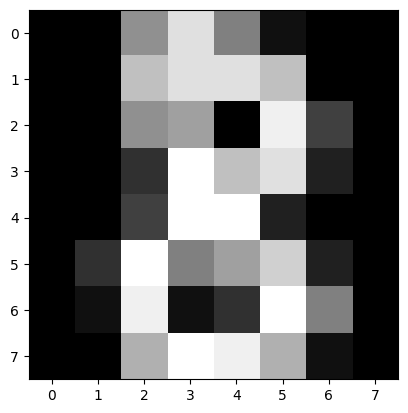

In [7]:
plt.imshow(digits.images[8],cmap=plt.cm.gray)

In [8]:
df=pd.DataFrame(digits.data)
df     # without target variable. only 64 features are here.

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [9]:
digits.target      # This is the target variable. for model building we are going to use this column as the target.

array([0, 1, 2, ..., 8, 9, 8])

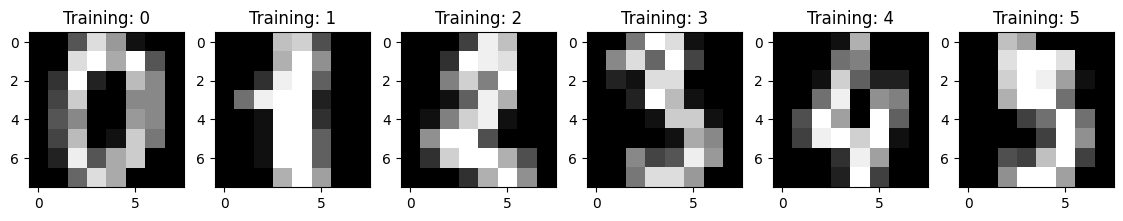

In [10]:
plt.figure(figsize=(14,4))
for index,(image,label) in enumerate(zip(digits.data[0:6],digits.target[0:6])):
    plt.subplot(1,6,index+1)
    plt.imshow(np.reshape(image,(8,8)),cmap=plt.cm.gray)
    plt.title(f"Training: {label}",fontsize=12)

In [11]:
x=digits.data
y=digits.target
print(x.shape,y.shape)

(1797, 64) (1797,)


In [12]:
from sklearn.preprocessing import StandardScaler
x_std=StandardScaler().fit_transform(x)
x_std

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

Here we get 1.7k+ entries with 64 column, to reduce to complexity of the data we are going to use PCA analysis which can curtail unnecessary columns from our dataset and make more robust to use.

for implementing PCA we need to fing the eigen values and eigen vectors of each column, so we transpose our data for desired result

In [13]:
X_transpose= x_std.T
X_transpose

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.33501649, -0.33501649, -0.33501649, ..., -0.33501649,
        -0.33501649, -0.33501649],
       [-0.04308102, -1.09493684, -1.09493684, ..., -0.88456568,
        -0.67419451,  1.00877481],
       ...,
       [-1.14664746,  0.54856067,  1.56568555, ..., -0.12952258,
         0.8876023 ,  0.8876023 ],
       [-0.5056698 , -0.5056698 ,  1.6951369 , ..., -0.5056698 ,
        -0.5056698 , -0.26113572],
       [-0.19600752, -0.19600752, -0.19600752, ..., -0.19600752,
        -0.19600752, -0.19600752]])

Covarience Matrix

In [14]:
cov=np.cov(X_transpose)
cov

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  1.00055679,  0.55692803, ..., -0.02988686,
         0.02656195, -0.04391324],
       [ 0.        ,  0.55692803,  1.00055679, ..., -0.04120565,
         0.07263924,  0.08256908],
       ...,
       [ 0.        , -0.02988686, -0.04120565, ...,  1.00055679,
         0.64868875,  0.26213704],
       [ 0.        ,  0.02656195,  0.07263924, ...,  0.64868875,
         1.00055679,  0.62077355],
       [ 0.        , -0.04391324,  0.08256908, ...,  0.26213704,
         0.62077355,  1.00055679]])

Eigen values and Eigen vectors

In [15]:
eigen_value,eigen_vector=np.linalg.eig(cov)
eigen_value

array([7.34477606, 5.83549054, 5.15396118, 3.96623597, 2.9663452 ,
       2.57204442, 2.40600941, 2.06867355, 1.82993314, 1.78951739,
       1.69784616, 1.57287889, 1.38870781, 1.35933609, 1.32152536,
       1.16829176, 1.08368678, 0.99977862, 0.97438293, 0.90891242,
       0.82271926, 0.77631014, 0.71155675, 0.64552365, 0.59527399,
       0.5765018 , 0.52673155, 0.5106363 , 0.48686381, 0.45560107,
       0.44285155, 0.42230086, 0.3991063 , 0.39110111, 0.36094517,
       0.34860306, 0.3195963 , 0.05037444, 0.29406627, 0.27692285,
       0.06328961, 0.258273  , 0.24783029, 0.2423566 , 0.07635394,
       0.08246812, 0.09018543, 0.09840876, 0.10250434, 0.11188655,
       0.11932898, 0.12426371, 0.13321081, 0.14311427, 0.217582  ,
       0.15818474, 0.16875236, 0.20799593, 0.17612894, 0.2000909 ,
       0.18983516, 0.        , 0.        , 0.        ])

In [16]:
eigen_vector

array([[ 0.        ,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.18223392, -0.04702701,  0.02358821, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.285868  , -0.0595648 , -0.05679875, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.103198  ,  0.24261778, -0.02227952, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.1198106 ,  0.16508926,  0.10036559, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.07149362,  0.07132924,  0.09244589, ...,  0.        ,
         0.        ,  0.        ]])

In [17]:
# individual explained varience
total_v=sum(eigen_value)
var_exp=[(i/total_v)*100 for i in sorted(eigen_value,reverse=True)]    
var_exp  # showing the contribution of each column/ importance of each column

[12.033916097734904,
 9.561054403097883,
 8.444414892624566,
 6.498407907524167,
 4.860154875966403,
 4.214119869271944,
 3.9420828035674003,
 3.3893809246383264,
 2.998221011625232,
 2.9320025512522068,
 2.781805463550326,
 2.5770550925819995,
 2.2753033157642486,
 2.227179739514353,
 2.1652294318492435,
 1.9141666064421259,
 1.7755470851681938,
 1.6380692742844212,
 1.5964601688623428,
 1.4891911870878194,
 1.3479695658179378,
 1.2719313702347599,
 1.1658373505919493,
 1.0576465985363224,
 0.9753159471981139,
 0.9445589897319981,
 0.8630138269707229,
 0.8366428536685183,
 0.7976932484112456,
 0.7464713709260611,
 0.725582151370274,
 0.691911245481183,
 0.6539085355726172,
 0.640792573845988,
 0.5913841117223424,
 0.571162405223525,
 0.5236368034166339,
 0.48180758644514254,
 0.45371925985845096,
 0.42316275323278085,
 0.4060530699790386,
 0.39708480827582743,
 0.3564933031426177,
 0.34078718147030074,
 0.32783533528795417,
 0.3110320073453569,
 0.28857529410893434,
 0.276489263523546

Now cumulative explained varience

In [18]:
cu_sum= np.cumsum(var_exp)
cu_sum

array([ 12.0339161 ,  21.5949705 ,  30.03938539,  36.5377933 ,
        41.39794818,  45.61206805,  49.55415085,  52.94353177,
        55.94175279,  58.87375534,  61.6555608 ,  64.23261589,
        66.50791921,  68.73509895,  70.90032838,  72.81449499,
        74.59004207,  76.22811135,  77.82457152,  79.3137627 ,
        80.66173227,  81.93366364,  83.09950099,  84.15714759,
        85.13246353,  86.07702252,  86.94003635,  87.77667921,
        88.57437245,  89.32084382,  90.04642598,  90.73833722,
        91.39224576,  92.03303833,  92.62442244,  93.19558485,
        93.71922165,  94.20102924,  94.6547485 ,  95.07791125,
        95.48396432,  95.88104913,  96.23754243,  96.57832961,
        96.90616495,  97.21719696,  97.50577225,  97.78226151,
        98.04143645,  98.27591946,  98.49417632,  98.69777395,
        98.89328638,  99.07660488,  99.24455127,  99.40578733,
        99.55355002,  99.68866843,  99.81376918,  99.91746491,
       100.        , 100.        , 100.        , 100.  

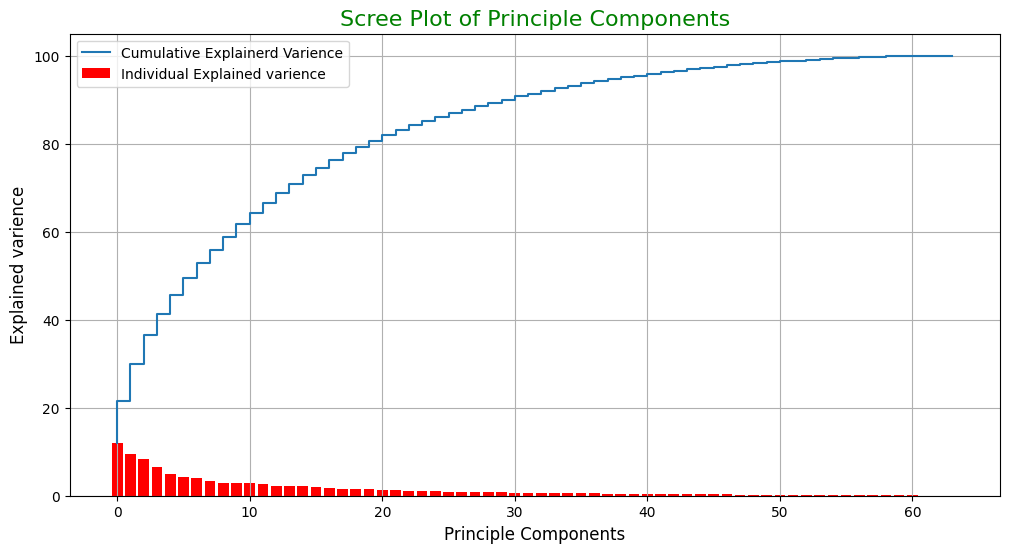

In [19]:
plt.figure(figsize=(12,6))
plt.bar(range(len(var_exp)),var_exp,label='Individual Explained varience',color='r')
plt.step(range(len(cu_sum)),cu_sum,label='Cumulative Explainerd Varience')
plt.xlabel('Principle Components',fontsize=12)
plt.ylabel('Explained varience',fontsize=12)
plt.title('Scree Plot of Principle Components',fontsize=16,color='g')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x_std,y,train_size=.8)
print(xtrain.shape,xtest.shape)

(1437, 64) (360, 64)


In [21]:
from sklearn.decomposition import PCA
Decomp=PCA(n_components=30)
pca_xtrain=Decomp.fit_transform(xtrain)
pca_xtest=Decomp.transform(xtest)
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier().fit(pca_xtrain,ytrain)
pred=DT.predict(pca_xtest)
pred

array([9, 7, 2, 7, 0, 0, 7, 2, 9, 6, 7, 5, 0, 3, 8, 4, 8, 1, 5, 6, 2, 1,
       9, 7, 4, 3, 4, 3, 7, 9, 5, 4, 9, 4, 3, 4, 9, 4, 8, 9, 8, 3, 5, 8,
       8, 7, 3, 9, 5, 9, 6, 3, 8, 1, 4, 1, 7, 3, 0, 1, 6, 0, 6, 8, 3, 7,
       1, 8, 4, 9, 7, 6, 5, 9, 9, 2, 7, 9, 6, 2, 4, 1, 2, 3, 4, 5, 1, 1,
       7, 5, 5, 3, 0, 8, 8, 0, 9, 3, 9, 9, 1, 3, 5, 9, 5, 5, 7, 6, 1, 6,
       2, 9, 3, 1, 9, 6, 4, 7, 0, 3, 9, 9, 5, 6, 4, 8, 6, 3, 6, 3, 2, 3,
       1, 1, 6, 2, 5, 1, 1, 0, 7, 2, 2, 1, 3, 4, 0, 3, 3, 1, 4, 1, 1, 5,
       2, 5, 2, 8, 5, 1, 8, 6, 7, 0, 2, 0, 9, 9, 8, 1, 0, 0, 1, 5, 7, 2,
       7, 7, 2, 1, 3, 5, 9, 6, 8, 1, 7, 9, 7, 6, 9, 7, 3, 9, 8, 3, 6, 4,
       1, 5, 3, 8, 7, 1, 0, 3, 3, 6, 0, 9, 6, 4, 7, 0, 7, 0, 2, 9, 8, 8,
       3, 3, 4, 2, 9, 5, 0, 5, 4, 0, 5, 7, 7, 5, 8, 4, 3, 2, 3, 3, 7, 9,
       0, 0, 7, 7, 7, 4, 0, 2, 7, 0, 6, 5, 7, 5, 9, 0, 7, 4, 1, 5, 9, 5,
       8, 9, 1, 6, 8, 7, 2, 0, 3, 7, 8, 6, 5, 1, 6, 6, 7, 1, 2, 4, 2, 4,
       2, 1, 7, 6, 0, 7, 9, 0, 6, 1, 9, 9, 0, 0, 4,

In [22]:
ytest

array([9, 7, 2, 7, 0, 0, 9, 3, 9, 6, 7, 5, 0, 3, 8, 4, 8, 0, 5, 6, 2, 1,
       9, 7, 4, 3, 4, 3, 7, 9, 5, 4, 7, 4, 2, 4, 9, 4, 8, 9, 2, 3, 5, 8,
       8, 7, 2, 9, 8, 9, 1, 3, 8, 1, 4, 1, 7, 5, 0, 1, 6, 0, 6, 8, 3, 7,
       1, 8, 4, 9, 7, 6, 5, 9, 9, 2, 7, 9, 6, 2, 5, 8, 2, 3, 5, 5, 8, 1,
       7, 3, 9, 3, 0, 8, 9, 0, 9, 3, 9, 9, 1, 3, 5, 9, 5, 5, 7, 6, 1, 6,
       2, 9, 3, 8, 8, 6, 4, 2, 0, 3, 7, 9, 5, 6, 4, 8, 6, 1, 6, 3, 2, 3,
       1, 1, 6, 8, 9, 1, 1, 0, 7, 2, 2, 1, 9, 4, 0, 3, 3, 1, 4, 1, 1, 9,
       4, 5, 2, 3, 5, 1, 8, 6, 7, 0, 2, 0, 9, 9, 5, 1, 0, 0, 7, 5, 7, 2,
       7, 7, 2, 9, 3, 5, 8, 6, 5, 1, 7, 9, 7, 1, 9, 7, 3, 5, 8, 2, 6, 4,
       1, 5, 3, 5, 7, 2, 6, 2, 3, 6, 0, 9, 6, 4, 7, 0, 7, 0, 2, 9, 5, 8,
       3, 2, 4, 7, 9, 5, 0, 5, 4, 0, 5, 7, 7, 5, 8, 4, 3, 9, 9, 3, 7, 9,
       2, 0, 7, 7, 7, 4, 0, 2, 7, 0, 6, 5, 7, 5, 8, 0, 7, 4, 6, 5, 2, 5,
       8, 9, 2, 6, 2, 7, 4, 0, 9, 7, 8, 6, 5, 1, 6, 6, 3, 1, 2, 4, 2, 4,
       2, 1, 7, 6, 9, 4, 9, 0, 6, 1, 9, 9, 0, 0, 4,

In [23]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(f'Accuracy of the model is: {accuracy_score(ytest,pred)}')
confusion_matrix(ytest,pred)

Accuracy of the model is: 0.8111111111111111


array([[32,  1,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0, 33,  0,  1,  0,  0,  2,  0,  0,  0],
       [ 1,  2, 22,  6,  0,  0,  0,  1,  3,  2],
       [ 0,  0,  1, 26,  0,  1,  0,  1,  1,  0],
       [ 0,  0,  2,  0, 26,  1,  0,  1,  1,  0],
       [ 0,  0,  0,  2,  2, 33,  0,  1,  5,  1],
       [ 1,  1,  0,  0,  0,  0, 29,  0,  0,  0],
       [ 0,  1,  2,  0,  0,  0,  0, 41,  0,  2],
       [ 0,  3,  1,  0,  0,  1,  0,  0, 19,  4],
       [ 1,  1,  1,  4,  0,  3,  0,  1,  1, 31]])